In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
features = pd.read_csv("/kaggle/input/walmart-recruiting-store-sales-forecasting/features.csv.zip")
train = pd.read_csv('/kaggle/input/walmart-recruiting-store-sales-forecasting/train.csv.zip')
stores = pd.read_csv('/kaggle/input/walmart-recruiting-store-sales-forecasting/stores.csv')
test = pd.read_csv('/kaggle/input/walmart-recruiting-store-sales-forecasting/test.csv.zip')
sample_submission = pd.read_csv('/kaggle/input/walmart-recruiting-store-sales-forecasting/sampleSubmission.csv.zip')

In [3]:
feature_store = features.merge(stores, how='inner', on = "Store")
train_df = train.merge(feature_store, how='inner', on = ['Store','Date','IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)
test_df = test.merge(feature_store, how='inner', on = ['Store','Date','IsHoliday']).sort_values(by = ['Store','Dept','Date']).reset_index(drop=True)

In [4]:
train_df = train.merge(feature_store, how='inner', on = ['Store','Date','IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)
test_df = test.merge(feature_store, how='inner', on = ['Store','Date','IsHoliday']).sort_values(by = ['Store','Dept','Date']).reset_index(drop=True)

In [5]:
train_df['Date'] = pd.to_datetime(train_df['Date'])
train_df['Year'] = pd.to_datetime(train_df['Date']).dt.year
train_df['Month'] = pd.to_datetime(train_df['Date']).dt.month
train_df['Week'] = pd.to_datetime(train_df['Date']).dt.isocalendar().week
train_df['Day'] = pd.to_datetime(train_df['Date']).dt.day

test_df['Date'] = pd.to_datetime(test_df['Date'])
test_df['Year'] = pd.to_datetime(test_df['Date']).dt.year
test_df['Month'] = pd.to_datetime(test_df['Date']).dt.month
test_df['Week'] = pd.to_datetime(test_df['Date']).dt.isocalendar().week
test_df['Day'] = pd.to_datetime(test_df['Date']).dt.day


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

In [7]:
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week,Day
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5,5
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,2010,2,6,12
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,2010,2,7,19
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,2010,2,8,26
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,2010,3,9,5


In [8]:
data_train = train_df.copy()
data_test = test_df.copy()


In [9]:
data_train

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week,Day
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,2,5,5
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,2010,2,6,12
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,2010,2,7,19
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,2010,2,8,26
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,2010,3,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221,2012,9,39,28
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,B,118221,2012,10,40,5
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,B,118221,2012,10,41,12
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221,2012,10,42,19


In [10]:
data_train.isna().sum()[data_train.isna().sum() > 0].sort_values(ascending=False)

MarkDown2    310322
MarkDown4    286603
MarkDown3    284479
MarkDown1    270889
MarkDown5    270138
dtype: int64

In [11]:
data_test.isna().sum()[data_test.isna().sum() > 0].sort_values(ascending=False)


CPI             38162
Unemployment    38162
MarkDown2       28627
MarkDown4       12888
MarkDown3        9829
MarkDown1         149
dtype: int64

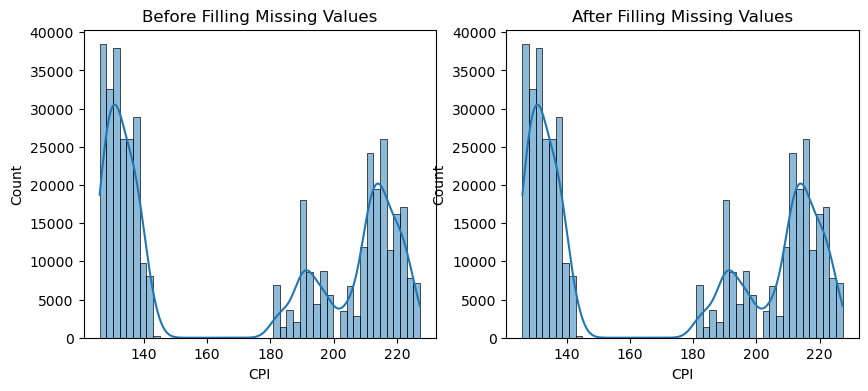

In [12]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sns.histplot(data=data_train, x="CPI", kde=True, ax=ax1)
ax1.set_title("Before Filling Missing Values")

mean_cpi = data_train['CPI'].mean(skipna=True)
data_train['CPI'].fillna(mean_cpi, inplace=True)

sns.histplot(data=data_train, x="CPI", kde=True, ax=ax2)
ax2.set_title("After Filling Missing Values")

plt.show()


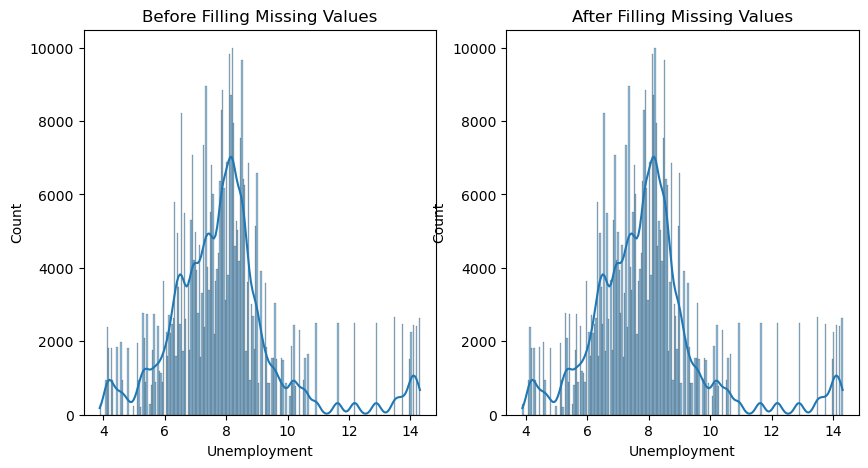

In [13]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.histplot(data=data_train, x="Unemployment", kde=True, ax=ax1)
ax1.set_title("Before Filling Missing Values")

mean_cpi = data_train['Unemployment'].mean(skipna=True)
data_train['CPI'].fillna(mean_cpi, inplace=True)

sns.histplot(data=data_train, x="Unemployment", kde=True, ax=ax2)
ax2.set_title("After Filling Missing Values")

plt.show()


In [14]:
data_train.fillna(0, inplace = True)
data_test['CPI'].fillna(data_test['CPI'].mean(), inplace = True)
data_test['Unemployment'].fillna(data_test['Unemployment'].mean(), inplace = True)
data_test.fillna(0, inplace = True)

In [15]:
data_train['IsHoliday'] = data_train['IsHoliday'].apply(lambda x: 1 if x == True else 0)
data_test['IsHoliday'] = data_test['IsHoliday'].apply(lambda x: 1 if x == True else 0)

In [16]:
data_train['Type'] = data_train['Type'].apply(lambda x: 1 if x == 'A' else (2 if x == 'B' else 3))
data_test['Type'] = data_test['Type'].apply(lambda x: 1 if x == 'A' else (2 if x == 'B' else 3))

In [17]:
data_train.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Year            0
Month           0
Week            0
Day             0
dtype: int64

# **Apply Deep Feature Engineering**

In [18]:
df_train = data_train.copy()
df_test = data_test.copy()
df_train = df_train.drop(['Date'], axis=1)
df_test = df_test.drop(['Date'], axis=1)


In [19]:
#train set
df_train['MarkDown'] = df_train['MarkDown1'] + df_train['MarkDown2'] + df_train['MarkDown3'] + df_train['MarkDown4'] + df_train['MarkDown5']
df_train = df_train.drop(columns=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'])

# test set
df_test['MarkDown'] = df_test['MarkDown1'] + df_test['MarkDown2'] + df_test['MarkDown3'] + df_test['MarkDown4'] + df_test['MarkDown5']
df_test = df_test.drop(columns=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'])

In [20]:
df_train['Days_to_Thansksgiving'] = (pd.to_datetime(train_df["Year"].astype(str)+"-11-24", format="%Y-%m-%d") - pd.to_datetime(train_df["Date"], format="%Y-%m-%d")).dt.days.astype(int)
df_train['Days_to_Christmas'] = (pd.to_datetime(train_df["Year"].astype(str)+"-12-24", format="%Y-%m-%d") - pd.to_datetime(train_df["Date"], format="%Y-%m-%d")).dt.days.astype(int)


In [21]:
df_test['Days_to_Thansksgiving'] = (pd.to_datetime(test_df["Year"].astype(str)+"-11-24", format="%Y-%m-%d") - pd.to_datetime(test_df["Date"], format="%Y-%m-%d")).dt.days.astype(int)
df_test['Days_to_Christmas'] = (pd.to_datetime(test_df["Year"].astype(str)+"-12-24", format="%Y-%m-%d") - pd.to_datetime(test_df["Date"], format="%Y-%m-%d")).dt.days.astype(int)

In [22]:
df_train['SuperBowlWeek'] = train_df['Week'].apply(lambda x: 1 if x == 6 else 0)
df_train['LaborDay'] = train_df['Week'].apply(lambda x: 1 if x == 36 else 0)
df_train['Tranksgiving'] = train_df['Week'].apply(lambda x: 1 if x == 47 else 0)
df_train['Christmas'] = train_df['Week'].apply(lambda x: 1 if x == 52 else 0)

In [23]:
df_test['SuperBowlWeek'] = test_df['Week'].apply(lambda x: 1 if x == 6 else 0)
df_test['LaborDay'] = test_df['Week'].apply(lambda x: 1 if x == 36 else 0)
df_test['Tranksgiving'] = test_df['Week'].apply(lambda x: 1 if x == 47 else 0)
df_test['Christmas'] = test_df['Week'].apply(lambda x: 1 if x == 52 else 0)

In [24]:
df_train

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,...,Month,Week,Day,MarkDown,Days_to_Thansksgiving,Days_to_Christmas,SuperBowlWeek,LaborDay,Tranksgiving,Christmas
0,1,1,24924.50,0,42.31,2.572,211.096358,8.106,1,151315,...,2,5,5,0.00,292,322,0,0,0,0
1,1,1,46039.49,1,38.51,2.548,211.242170,8.106,1,151315,...,2,6,12,0.00,285,315,1,0,0,0
2,1,1,41595.55,0,39.93,2.514,211.289143,8.106,1,151315,...,2,7,19,0.00,278,308,0,0,0,0
3,1,1,19403.54,0,46.63,2.561,211.319643,8.106,1,151315,...,2,8,26,0.00,271,301,0,0,0,0
4,1,1,21827.90,0,46.50,2.625,211.350143,8.106,1,151315,...,3,9,5,0.00,264,294,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,508.37,0,64.88,3.997,192.013558,8.684,2,118221,...,9,39,28,9468.01,57,87,0,0,0,0
421566,45,98,628.10,0,64.89,3.985,192.170412,8.667,2,118221,...,10,40,5,9659.00,50,80,0,0,0,0
421567,45,98,1061.02,0,54.47,4.000,192.327265,8.667,2,118221,...,10,41,12,6554.03,43,73,0,0,0,0
421568,45,98,760.01,0,56.47,3.969,192.330854,8.667,2,118221,...,10,42,19,3982.42,36,66,0,0,0,0


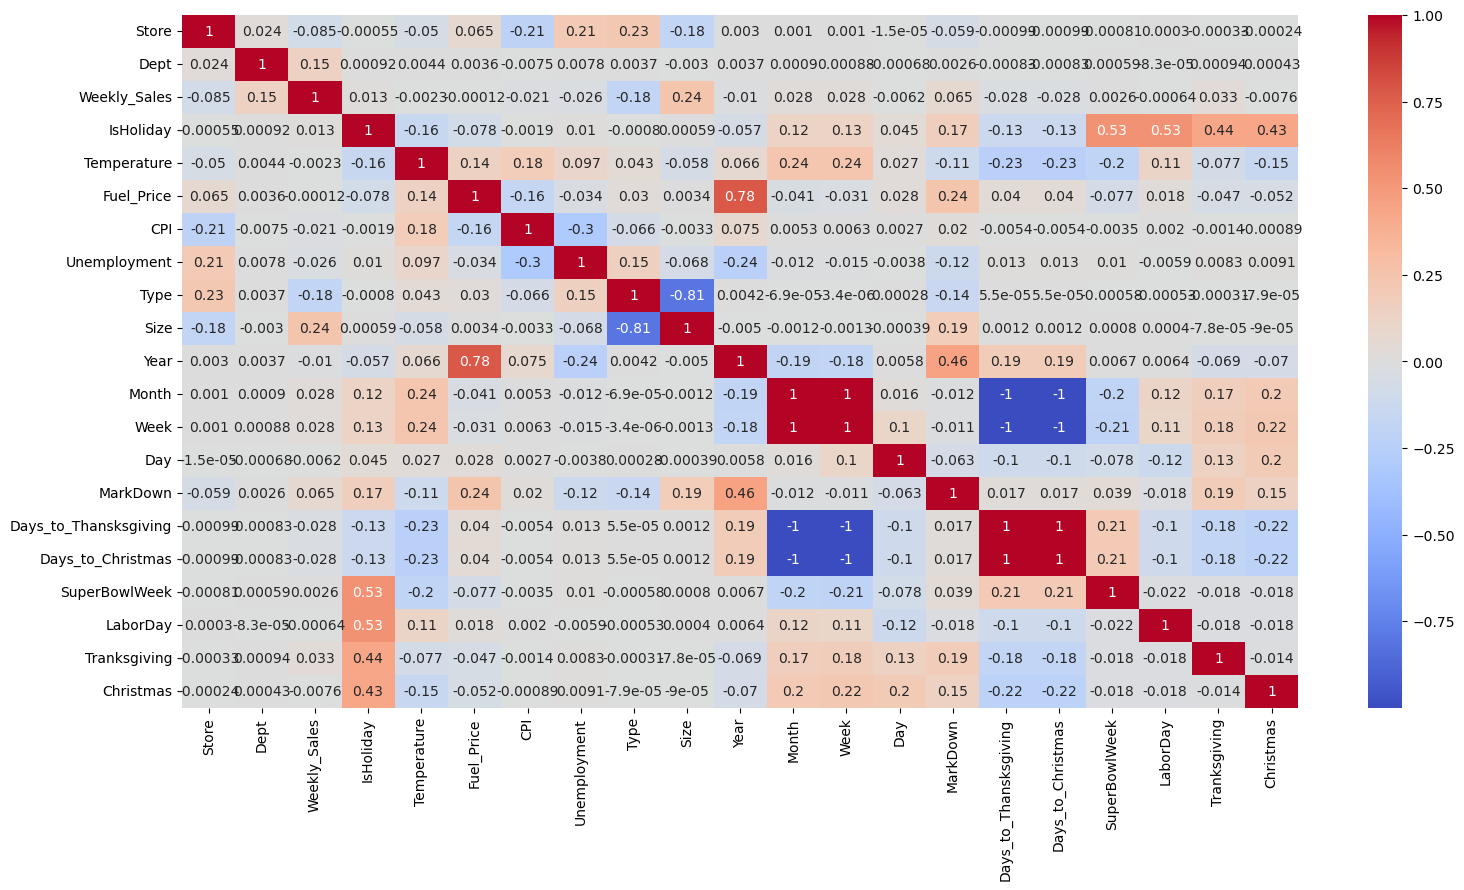

In [25]:
fig = plt.subplots(figsize = (18,9))
corr = df_train.corr()
sns.heatmap(corr, annot= True, cmap = 'coolwarm')
plt.show()

# **Robust Sclaler**

In [26]:
from sklearn import preprocessing
transform_columns = ['Size', 'MarkDown', 'CPI', 'Temperature', 'Fuel_Price', 'Unemployment']
for column_label in transform_columns:
    robust_scaler = preprocessing.RobustScaler().fit(df_train[[column_label]])
    df_train[column_label] = robust_scaler.transform(df_train[[column_label]])
    df_test[column_label] = robust_scaler.transform(df_test[[column_label]])

# **Feature Selection**

In [27]:
import warnings
warnings.filterwarnings("ignore")

corr_matrix = df_train.corr()["Weekly_Sales"].sort_values(ascending=False)
highly_correlated = corr_matrix[abs(corr_matrix) >= 0]
# Get the names of the highly correlated features
names = list(highly_correlated.index)
names.remove('Weekly_Sales')
# names.append('Year')
print(names)

['Size', 'Dept', 'MarkDown', 'Tranksgiving', 'Month', 'Week', 'IsHoliday', 'SuperBowlWeek', 'Fuel_Price', 'LaborDay', 'Temperature', 'Day', 'Christmas', 'Year', 'CPI', 'Unemployment', 'Days_to_Thansksgiving', 'Days_to_Christmas', 'Store', 'Type']


In [28]:
# names.remove('MarkDown')
# names.remove('SuperBowlWeek')

In [29]:
df_train['Week'] = df_train['Week'].astype(int)
df_test['Week'] = df_test['Week'].astype(int)

In [30]:
def WMAE(dataset, real, predicted):
    weights = dataset.IsHoliday.apply(lambda x: 5 if x else 1)
    return np.round(np.sum(weights*abs(real-predicted))/(np.sum(weights)), 2)

# Random Forest

In [31]:
# X = df_train[names]
# y = df_train['Weekly_Sales']

# # Create a Random Forest regressor
# rf = RandomForestRegressor(n_estimators=60, max_depth=25, min_samples_split=3, min_samples_leaf=1)

# # Train the model
# rf.fit(X, y)

# # Sort feature importances in ascending order
# sorted_importance = sorted(zip(names, importance), key=lambda x: x[1])

# # Print feature importances
# for feature_name, importance_score in sorted_importance:
#     print("{}: {:.4f}".format(feature_name, importance_score))

In [32]:
df_train

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,...,Month,Week,Day,MarkDown,Days_to_Thansksgiving,Days_to_Christmas,SuperBowlWeek,LaborDay,Tranksgiving,Christmas
0,1,1,24924.50,0,-0.716667,-1.093168,0.357955,0.142772,1,0.102400,...,2,5,5,0.000000,292,322,0,0,0,0
1,1,1,46039.49,1,-0.854348,-1.122981,0.359769,0.142772,1,0.102400,...,2,6,12,0.000000,285,315,1,0,0,0
2,1,1,41595.55,0,-0.802899,-1.165217,0.360353,0.142772,1,0.102400,...,2,7,19,0.000000,278,308,0,0,0,0
3,1,1,19403.54,0,-0.560145,-1.106832,0.360733,0.142772,1,0.102400,...,2,8,26,0.000000,271,301,0,0,0,0
4,1,1,21827.90,0,-0.564855,-1.027329,0.361112,0.142772,1,0.102400,...,3,9,5,0.000000,264,294,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,508.37,0,0.101087,0.677019,0.120590,0.486615,2,-0.201585,...,9,39,28,1.172471,57,87,0,0,0,0
421566,45,98,628.10,0,0.101449,0.662112,0.122541,0.476502,2,-0.201585,...,10,40,5,1.196122,50,80,0,0,0,0
421567,45,98,1061.02,0,-0.276087,0.680745,0.124492,0.476502,2,-0.201585,...,10,41,12,0.811618,43,73,0,0,0,0
421568,45,98,760.01,0,-0.203623,0.642236,0.124537,0.476502,2,-0.201585,...,10,42,19,0.493163,36,66,0,0,0,0


In [33]:
df_test

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Year,Month,Week,Day,MarkDown,Days_to_Thansksgiving,Days_to_Christmas,SuperBowlWeek,LaborDay,Tranksgiving,Christmas
0,1,1,0,-0.245290,-0.081988,0.511777,-0.769185,1,0.102400,2012,11,44,2,2.271417,22,52,0,0,0,0
1,1,1,0,-0.030797,-0.171429,0.512008,-0.769185,1,0.102400,2012,11,45,9,3.174318,15,45,0,0,0,0
2,1,1,0,-0.332246,-0.248447,0.512401,-0.769185,1,0.102400,2012,11,46,16,2.208969,8,38,0,0,0,0
3,1,1,1,-0.212319,-0.299379,0.513011,-0.769185,1,0.102400,2012,11,47,23,9.450013,1,31,0,0,1,0
4,1,1,0,-0.353261,-0.304348,0.513621,-0.769185,1,0.102400,2012,11,48,30,1.661283,-6,24,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,0,0.505797,0.232298,-0.066639,-0.593258,2,-0.201585,2013,6,26,28,1.416670,149,179,0,0,0,0
115060,45,98,0,0.558333,0.201242,-0.066639,-0.593258,2,-0.201585,2013,7,27,5,2.384344,142,172,0,0,0,0
115061,45,98,0,0.626087,0.201242,-0.066639,-0.593258,2,-0.201585,2013,7,28,12,1.064755,135,165,0,0,0,0
115062,45,98,0,0.751812,0.354037,-0.066639,-0.593258,2,-0.201585,2013,7,29,19,0.697836,128,158,0,0,0,0


In [34]:
# from sklearn.model_selection import train_test_split
# names = ['Store', 'Dept', 'IsHoliday', 'Size', 'Week','Day','Month','Type','Days_to_Thansksgiving', 'Tranksgiving', 'CPI','Christmas','Days_to_Christmas','LaborDay']
# # Prepare data
# X = df_train[names]
# y = df_train['Weekly_Sales']

# # Split the data into training and testing sets
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# # Create a Random Forest regressor
# rf = RandomForestRegressor(n_estimators=60, max_depth=25, min_samples_split=3, min_samples_leaf=1)

# # Train the model
# rf.fit(X_train, y_train)

# # Make predictions on the test set
# rf_pred = rf.predict(X_valid)

# train_wmae_rf = WMAE(X_valid, y_valid, rf_pred)
# print('The WMAE loss for the training set is {}.'.format(train_wmae_rf))

# **Testing and Submission**

In [35]:
# # Prepare data
names = ['Store','Dept','IsHoliday','Size','Week','Type','Year','Day']
X_test = df_test[names]
X = df_train[names]
y = df_train['Weekly_Sales']

# Create a Random Forest regressor
rf = RandomForestRegressor(random_state=42)

# Train the model
rf.fit(X, y)

# Make predictions on the test set
rf_pred = rf.predict(X_test)

In [36]:
sample_submission['Weekly_Sales'] = rf_pred
sample_submission.to_csv('submission.csv', index=False)
sample_submission

,Id,Weekly_Sales
0,1_1_2012-11-02,34907.2657
1,1_1_2012-11-09,20129.6688
2,1_1_2012-11-16,19291.4357
3,1_1_2012-11-23,20198.3457
4,1_1_2012-11-30,28672.5225
...,...,...
115059,45_98_2013-06-28,657.7145
115060,45_98_2013-07-05,681.6062
115061,45_98_2013-07-12,737.7081
115062,45_98_2013-07-19,765.9891
